In [3]:
#Import Dependencies and requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
# Loading the ETL data in to Pandas
Loan_approval_df = pd.read_csv("../Datasets/ETL_Completed_LoanApprovalPrediction.csv")

In [5]:
# Load the data for the Neural Network
X = Loan_approval_df.drop(['Loan_Status'], axis=1)
Y = Loan_approval_df['Loan_Status']

In [6]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, stratify=Y)

In [7]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=11))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                960       
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4351 (17.00 KB)
Trainable params: 4351 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Train the model
history = nn.fit(X_train_scaled, Y_train, epochs=100, verbose=1, validation_data=(X_test_scaled, Y_test))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.6745 - accuracy: 0.5979 - val_loss: 0.6462 - val_accuracy: 0.7323
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6013 - accuracy: 0.7804 - val_loss: 0.5933 - val_accuracy: 0.7559
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5497 - accuracy: 0.7937 - val_loss: 0.5524 - val_accuracy: 0.7953
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5082 - accuracy: 0.8148 - val_loss: 0.5261 - val_accuracy: 0.8031
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.8175 - val_loss: 0.5139 - val_accuracy: 0.8031
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.8228 - val_loss: 0.5109 - val_accuracy: 0.7953
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8228 - val_loss: 0.5162 - val_accuracy: 0.7953
Epoch 8/100


In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, Y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 1.6340 - accuracy: 0.7008 - 54ms/epoch - 13ms/step
Loss: 1.633976936340332, Accuracy: 0.7007874250411987


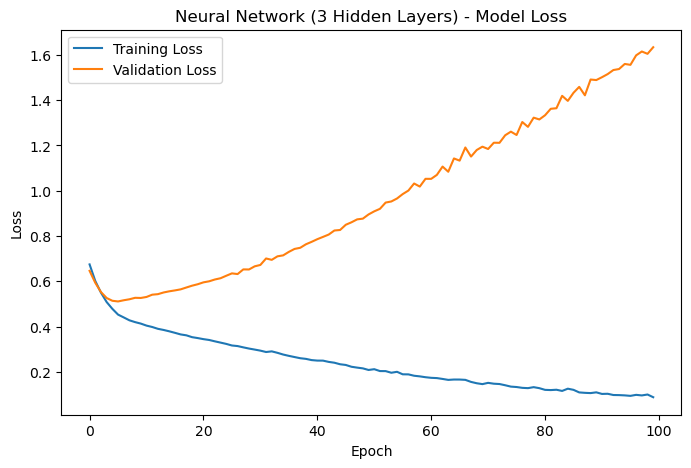

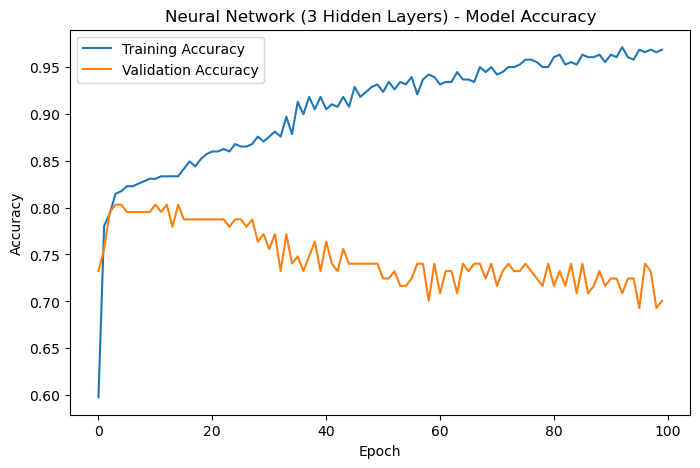

In [13]:
# Plot the Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network (3 Hidden Layers) - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network (3 Hidden Layers) - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()